# ***EXPERIMENT-4***

### **Multiple Linear Regression**

Multiple linear regression extends the concept of simple linear regression by modeling the relationship between a dependent variable (Y) and two or more independent variables (X₁, X₂, ..., Xₙ). It assumes a linear relationship between the dependent variable and the independent variables.

### **Polynomial Regression**

Polynomial regression is a type of regression analysis where the relationship between the independent variable X and the dependent variable 
Y is modeled as an n-th degree polynomial. It is useful for capturing non-linear relationships.


### **Cross-Validation**

Cross-validation is a statistical method used to evaluate the performance of a model by partitioning the data into training and testing subsets. It helps assess how well the model generalizes to unseen data and prevents overfitting.
### *Types of Cross-Validation:*
### *K-Fold Cross-Validation*:
Divides the dataset into K subsets (folds) and trains the model on K−1 folds while testing on the remaining fold. This process is repeated 
K times.
### *Leave-One-Out Cross-Validation (LOOCV)*:
A special case of K-fold cross-validation where. K is equal to the number of data points.
### *Stratified* 
K-Fold Cross-Validation: Similar to K-fold, but ensures each fold has a proportional representation of target classes.
The average performance metric (e.g., accuracy, RMSE) from all iterations is used to evaluate the model.


 ***Importing Libraries***

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

***Data Reading***

In [12]:
df = "advertising.csv"
data = pd.read_csv(df)
data = pd.DataFrame(data)
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [14]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


***Data Cleaning***

In [17]:
data.isnull().sum()*100/data.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

***Correlation between columns***

<Axes: >

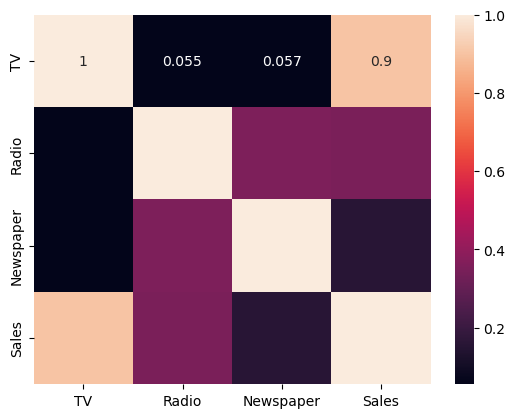

In [20]:
import seaborn as sns
sns.heatmap(data.corr(),annot = True)

***Split the data into predictors (X) and target (y)***

In [21]:
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

***Split the data into training and testing sets***

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ***Multiple Linear Regression***

In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

***Prediction*** 

In [33]:
y_pred_linear = linear_model.predict(X_test)

y_pred_linear = linear_model.predict(X_test)

 ***Evaluation for Linear Regression***


In [28]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Step 1: Multiple Linear Regression")
print(f"Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"R-squared (R2): {r2_linear:.4f}\n")

Step 1: Multiple Linear Regression
Mean Absolute Error (MAE): 1.2748
R-squared (R2): 0.9059



### ***Polynomial Regression***

In [29]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_model = Pipeline([
    ("polynomial_features", polynomial_features),
    ("linear_regression", LinearRegression()),
])

polynomial_model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

***Predictions***

In [30]:
y_pred_poly = polynomial_model.predict(X_test)

***Evaluation for Polynomial Regression***

In [31]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Step 2: Polynomial Regression")
print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"R-squared (R2): {r2_poly:.4f}\n")

Step 2: Polynomial Regression
Mean Absolute Error (MAE): 0.9034
R-squared (R2): 0.9533



### ***Cross-validation Comparison***

In [35]:
cv_scores_linear = cross_val_score(linear_model, X, y, scoring="neg_mean_absolute_error", cv=5)
cv_scores_poly = cross_val_score(polynomial_model, X, y, scoring="neg_mean_absolute_error", cv=5)

print("Step 3: Cross-validation Comparison")
print(f"Linear Regression - Mean CV MAE: {-np.mean(cv_scores_linear):.4f}")
print(f"Polynomial Regression - Mean CV MAE: {-np.mean(cv_scores_poly):.4f}")

Step 3: Cross-validation Comparison
Linear Regression - Mean CV MAE: 1.2683
Polynomial Regression - Mean CV MAE: 1.0676


### ***Plot actual vs predicted for Linear Regression***

Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted')

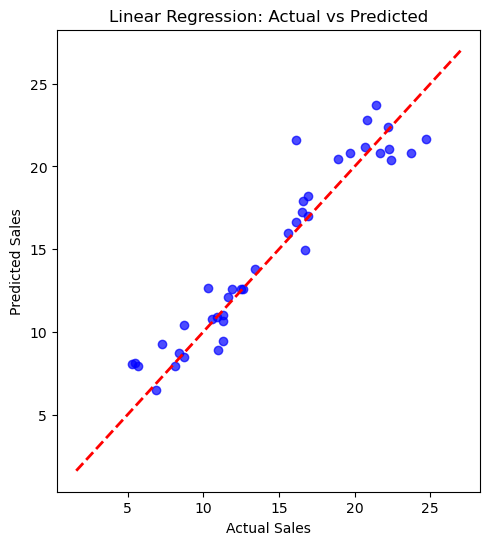

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted')

### ***Plot actual vs predicted for Polynomial Regression***

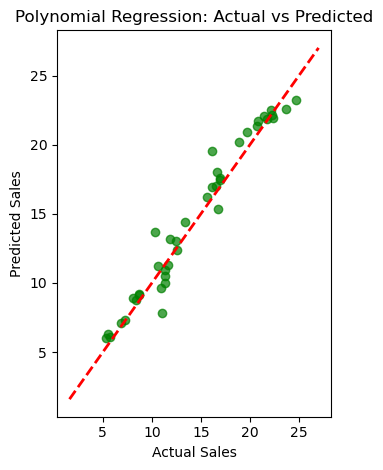

In [39]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Polynomial Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()
